In [1]:
!wget https://www.dropbox.com/s/y9hooknj3zmeqmw/data.zip

--2022-05-31 11:27:35--  https://www.dropbox.com/s/y9hooknj3zmeqmw/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/y9hooknj3zmeqmw/data.zip [following]
--2022-05-31 11:27:35--  https://www.dropbox.com/s/raw/y9hooknj3zmeqmw/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb166a723cb8f4d33d3b55ae8db.dl.dropboxusercontent.com/cd/0/inline/BmSlvXdYnN3m5ddhPiQzegDW_FIRyfcHkj5mFqxv5OA3A9Ow1fKBVCl34rwukx57dh1mUaRIYUUgZTEtJn9jihbnBH-fAJmWU58AKcV0EfjO5Tn_N_mI-YN82NY_dlbFKxAsWgpkvtjdVOlg6JYJlj0EGGpvE-QiotXu9cR8uZJsKA/file# [following]
--2022-05-31 11:27:36--  https://ucb166a723cb8f4d33d3b55ae8db.dl.dropboxusercontent.com/cd/0/inline/BmSlvXdYnN3m5ddhPiQzegDW_FIRyfcHkj5mFqxv5OA3A9Ow1fKBVCl34rwukx57dh1mUaRIYUUgZTEt

In [2]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/test/
   creating: data/test/cats/
  inflating: data/test/cats/cat.250.jpg  
  inflating: data/test/cats/cat.251.jpg  
  inflating: data/test/cats/cat.252.jpg  
  inflating: data/test/cats/cat.253.jpg  
  inflating: data/test/cats/cat.254.jpg  
  inflating: data/test/cats/cat.255.jpg  
  inflating: data/test/cats/cat.256.jpg  
  inflating: data/test/cats/cat.257.jpg  
  inflating: data/test/cats/cat.258.jpg  
  inflating: data/test/cats/cat.259.jpg  
  inflating: data/test/cats/cat.260.jpg  
  inflating: data/test/cats/cat.261.jpg  
  inflating: data/test/cats/cat.262.jpg  
  inflating: data/test/cats/cat.263.jpg  
  inflating: data/test/cats/cat.264.jpg  
  inflating: data/test/cats/cat.265.jpg  
  inflating: data/test/cats/cat.266.jpg  
  inflating: data/test/cats/cat.267.jpg  
  inflating: data/test/cats/cat.268.jpg  
  inflating: data/test/cats/cat.269.jpg  
  inflating: data/test/cats/cat.270.jpg  
  inflating: data/test/cats/cat.271.j

In [3]:
# Base variables
import os
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

train_size, validation_size, test_size = 200, 100, 100

img_width, img_height = 224, 224  # Default input size for VGG16

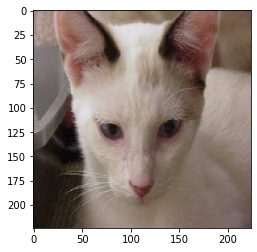

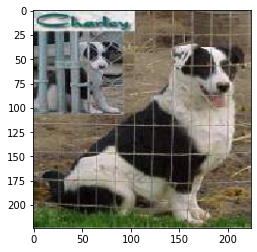

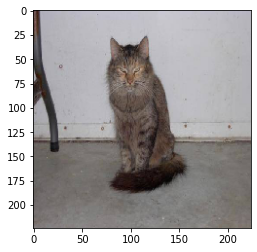

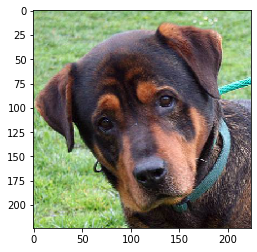

In [4]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    show_pictures(train_cats_dir)
    show_pictures(train_dogs_dir)

In [8]:
import tensorflow as tf


In [9]:
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_width, img_height, 3),
    pooling=None,
    classifier_activation='softmax'
)

58900480/58889256 [==============================] - 0s 0us/step


In [11]:
cov_base = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_width, img_height, 3),
    pooling=None,
    classifier_activation='softmax'
)

In [12]:
cov_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = cov_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)


Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [24]:
#Debug
print(train_features)
print(train_labels)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.21638644e-01 0.00000000e+00]
   [6.19308054e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.28741944e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.85949135e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.16669381e-01 0.00000000e+00]
   [4.14141864e-02 0.00000000e+00 0.00000000e+00 ... 5.51410913e-01
    7.40114331e-01 0.00000000e+00]
   [4.02727336e-01 0.00000000e+00 3.97308350e-01 ... 7.14887857e-01
    9.08397675e-01 0.00000000e+00]]

  [[6.99168444e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.37069869e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.69309878e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 1.08011746e+00 ... 3.90089005e-01
    5.45043826e-01 0.00000000e+00]
   ...
   [1.92977250e+00 0.00000000e+00 5.31581044e-02 ... 0.00

In [25]:
#Define model
from keras import models
from keras import layers
from keras import optimizers
epochs = 100
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256,activation='relu',input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [30]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['acc'])
           

In [31]:
#Train Model

history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
7/7 [==============================] - 2s 141ms/step - loss: 1.9052 - acc: 0.6150 - val_loss: 0.3829 - val_acc: 0.8300
Epoch 2/100
7/7 [==============================] - 0s 61ms/step - loss: 0.4765 - acc: 0.8500 - val_loss: 0.8331 - val_acc: 0.6300
Epoch 3/100
7/7 [==============================] - 1s 123ms/step - loss: 0.3398 - acc: 0.8700 - val_loss: 0.9250 - val_acc: 0.7400
Epoch 4/100
7/7 [==============================] - 1s 103ms/step - loss: 0.1807 - acc: 0.9250 - val_loss: 0.4334 - val_acc: 0.8000
Epoch 5/100
7/7 [==============================] - 1s 118ms/step - loss: 0.1375 - acc: 0.9250 - val_loss: 0.4533 - val_acc: 0.8500
Epoch 6/100
7/7 [==============================] - 1s 119ms/step - loss: 0.1500 - acc: 0.9650 - val_loss: 0.4404 - val_acc: 0.8300
Epoch 7/100
7/7 [==============================] - 1s 66ms/step - loss: 0.0604 - acc: 0.9850 - val_loss: 0.5122 - val_acc: 0.8200
Epoch 8/100
7/7 [==============================] - 0s 58ms/step - loss: 0.0384 - acc:

In [37]:
def visualize_predictions(classifier,n_cases):
  for i in range(0,n_cases):
    path = random.choice(['/content/data/test/cats', '/content/data/test/dogs'])
    
    #Get picture
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)
    img = image.load_img(img_path,target_size=(img_width,img_height))
    img_tensor= image.img_to_array(img) # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

    #Extract Features
    features = cov_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    #Make prediction
    try:
        prediction = classifier.predict(features)
    except:
        prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('Cat')
        else:
            print('Dog')

In [38]:
# Visualize predictions
visualize_predictions(model, 2)


In [39]:
#Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))

In [40]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#build model

In [42]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import LinearSVC

X_train, y_train = svm_features.reshape(300,7*7*512), svm_labels

param = [{
          "C": [0.01, 0.1, 1, 10, 100]
         }]
 
svm = LinearSVC(penalty='l2', loss='squared_hinge')  # As in Tang (2013)
clf = GridSearchCV(svm, param, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100]}])

In [43]:
#Save model
model.save('dog_cat_svm.h5')

In [44]:
#Evaluate model

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
print("\nAccuracy score (mean):")
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
print("\nAccuracy score (standard deviation):")
print(np.std(cross_val_score(clf, X_train, y_train, cv=10)))


Accuracy score (mean):
0.8600000000000001

Accuracy score (standard deviation):
0.05333333333333333


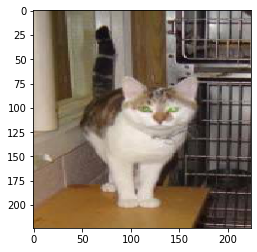

Cat


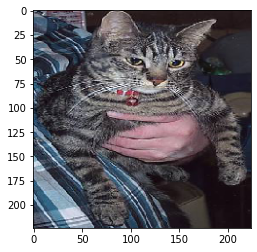

Cat


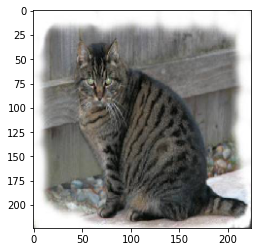

Cat


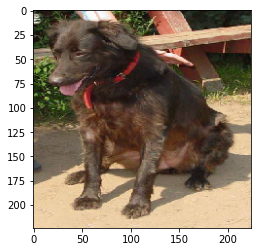

Dog


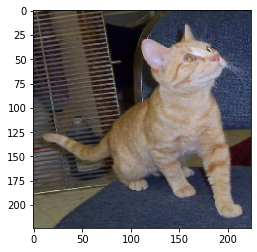

Dog


In [46]:
# Visualize predictions
visualize_predictions(clf, 5)